<a href="https://colab.research.google.com/github/esraa-abdelmaksoud/Shai-Training-Notebooks/blob/main/Fashion_MNIST_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attempt to solve Fashion MNIST Dataset using Dense Neural Network
## Bibliography 
* Keras official Tutorial
* Deep Learning with Python by François Chollet

## About DataSet 
**Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.**


In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import os


# Load Dataset and Split it to test and train set

see this link
https://medium.com/the-data-science-publication/how-to-import-and-display-the-fashion-mnist-dataset-using-tensorflow-e72522f684d0

In [17]:
#Getting training and testing data from tensorflow
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

28*28 image pixels

In [18]:
#Training Set shape
X_train_full.shape

(60000, 28, 28)

In [19]:
#Test Set consists of 10000 samples with one label field and 28*28 image pixels
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [20]:
#Labels from 0 to 9 are following Items 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Split training data to train and valid

In [21]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## Some images with their labels 

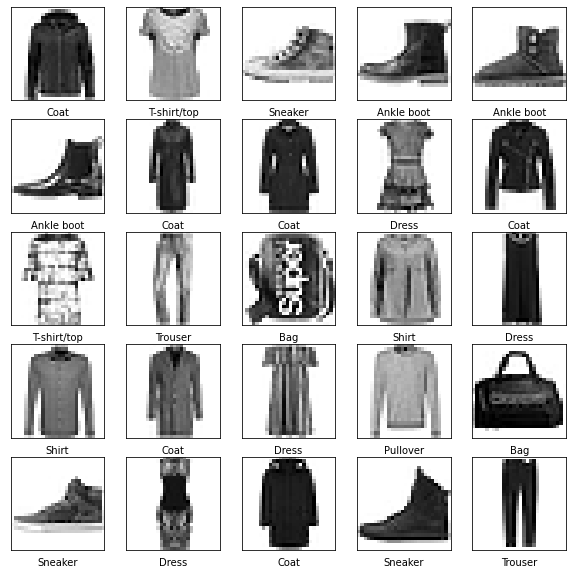

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(X_train[i]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [23]:
# Rescaling training to range 0 to 1 by dividing them by 255
X_train = X_train / 255.0
# Rescaling validation data too
X_valid = X_valid / 255.0

**Creating a Deep Neural Network with any number of layer you want.**

In [40]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

**Compiling the model.**

In [41]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Training model with a part of training data and evaluating it with another part of training data
and get more than 90% val_acc**

In [42]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 5s 2ms/step - loss: 0.5137 - accuracy: 0.8156 - val_loss: 0.3742 - val_accuracy: 0.8662
Epoch 2/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3752 - accuracy: 0.8629 - val_loss: 0.3564 - val_accuracy: 0.8676
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3387 - accuracy: 0.8756 - val_loss: 0.3341 - val_accuracy: 0.8802
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3144 - accuracy: 0.8845 - val_loss: 0.3379 - val_accuracy: 0.8786
Epoch 5/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2997 - accuracy: 0.8885 - val_loss: 0.3219 - val_accuracy: 0.8850
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2812 - accuracy: 0.8951 - val_loss: 0.3181 - val_accuracy: 0.8914
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2702 - accuracy: 0.8977 - val_loss: 0.3166 - val_accuracy:

# Visualize Model Training History in Keras

See this link
https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

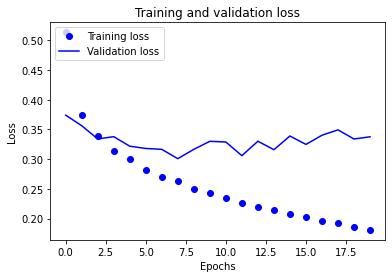

In [50]:
# summarize history for loss
plt.plot(history.history['loss'], marker='o', linewidth=0, color='blue')
plt.plot(history.history['val_loss'], color='blue')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'Validation loss'], loc='upper left')
plt.show()

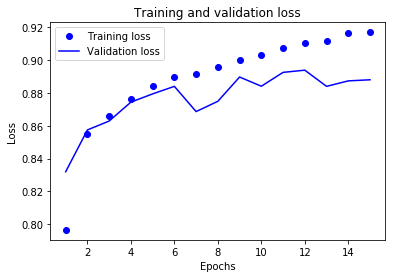

In [ ]:
# This original plot shows poor training. We should minimize the loss, not maximize it.

# Evaluate the model with our Test Set Using confusion_matrix

-split data to X_test and Y_test
-Rescaling training to range 0 to 1 by dividing them by 255

In [51]:
# Already split earlier to X_test and y_test
X_test = X_test / 255.0

visualization

In [56]:
preds = model.predict(X_train)
classes=np.argmax(preds,axis=1)

1719/1719 [==============================] - 4s 2ms/step


In [75]:
unique, counts = np.unique(classes, return_counts=True)
pred_count = {"classes":unique,"values":counts}
df = pd.DataFrame.from_dict(pred_count)

In [77]:
df

,classes,values
0,0,5986
1,1,5439
2,2,5556
3,3,5664
4,4,5812
5,5,5528
6,6,4535
7,7,5395
8,8,5545
9,9,5540


<AxesSubplot:>

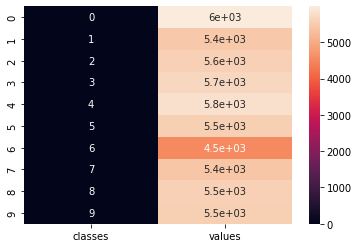

In [76]:
sns.heatmap(df, annot=True)

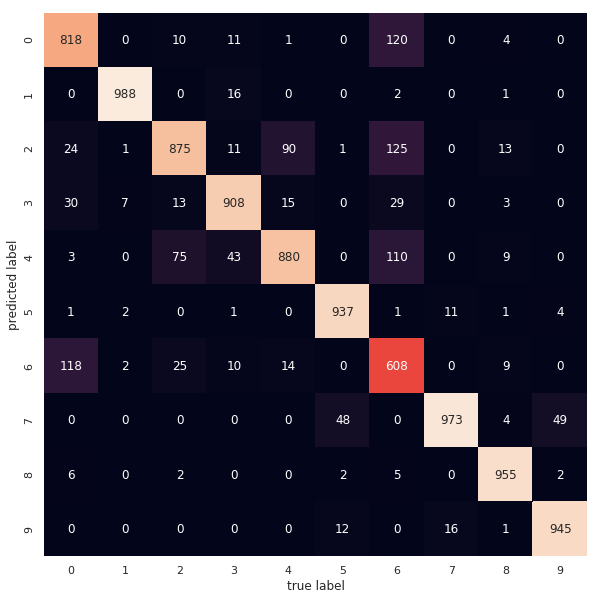

Find classification_report for the prediction

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       964
           1       0.99      0.98      0.98      1007
           2       0.88      0.77      0.82      1140
           3       0.91      0.90      0.91      1005
           4       0.88      0.79      0.83      1120
           5       0.94      0.98      0.96       958
           6       0.61      0.77      0.68       786
           7       0.97      0.91      0.94      1074
           8       0.95      0.98      0.97       972
           9       0.94      0.97      0.96       974

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Use model.evaluate the test data

10000/10000 [==============================] - 0s 33us/step
0.3251454734802246 0.8887
